# Chapter 6, Example 1a

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [2]:
no_epochs = 1000

no_labels = 3
no_features = 4
hidden_units = 5

no_exps = 10

seed = 10
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

X = iris.data
Y = iris.target
no_data = len(iris.data)

In [4]:
acc = []
for exp in range(no_exps):

    idx = np.arange(no_data)
    np.random.shuffle(idx)
    XX, YY = X[idx], Y[idx]
    x_train, y_train, x_test, y_test = XX[:100], YY[:100], XX[100:], YY[100:]

    model = Sequential([
        Dense(hidden_units, activation='relu'),
        Dense(no_labels, activation='softmax')])
    
    model.compile(optimizer='sgd', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=False,
                    validation_data=(x_test, y_test))
    
    acc.append(history.history['val_accuracy'][no_epochs-1])
    
    print('exp %d test accuracy %g'%(exp, acc[exp]))
    
print('* mean accuracy = %g *'% np.mean(acc))

exp 0 test accuracy 0.96
exp 1 test accuracy 0.96
exp 2 test accuracy 0.94
exp 3 test accuracy 0.94
exp 4 test accuracy 1
exp 5 test accuracy 0.98
exp 6 test accuracy 0.98
exp 7 test accuracy 1
exp 8 test accuracy 0.98
exp 9 test accuracy 0.96
* mean accuracy = 0.97 *


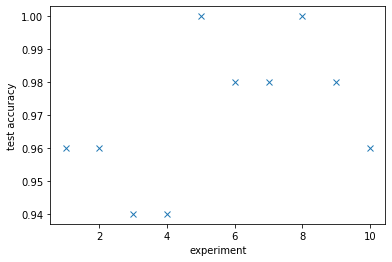

In [5]:
plt.figure(1)
plt.plot(np.arange(no_exps)+1, acc, marker = 'x', linestyle = 'None')
plt.xticks([2, 4, 6, 8, 10])
plt.xlabel('experiment')
plt.ylabel('test accuracy')
plt.savefig('./figures/6.1a_1.png')